In [2]:
def expand_x_1(n): 
# This version uses a generator and thus less computations
    c =1
    for i in range(n/2+1):
        c = c*(n-i)/(i+1)
        yield c

def aks(p):
    if p==2:
        return True
 
    for i in expand_x_1(p):
        if i % p:
# we stop without computing all possible solutions
            return False
    return True

In [5]:
def expand_x_1(p):
    ex = [1]
    for i in range(p):
        ex.append(ex[-1] * -(p-i) / (i+1))
    return ex[::-1]
 
def aks_test(p):
    if p < 2: return False
    ex = expand_x_1(p)
    ex[0] += 1
    return not any(mult % p for mult in ex[0:-1])
 
 
print('# p: (x-1)^p for small p')
for p in range(12):
    print('%3i: %s' % (p, ' '.join('%+i%s' % (e, ('x^%i' % n) if n else '')
                                   for n,e in enumerate(expand_x_1(p)))))
 
print('\n# small primes using the aks test')
print([p for p in range(101) if aks_test(p)])

# p: (x-1)^p for small p
  0: +1
  1: -1 +1x^1
  2: +1 -2x^1 +1x^2
  3: -1 +3x^1 -3x^2 +1x^3
  4: +1 -4x^1 +6x^2 -4x^3 +1x^4
  5: -1 +5x^1 -10x^2 +10x^3 -5x^4 +1x^5
  6: +1 -6x^1 +15x^2 -20x^3 +15x^4 -6x^5 +1x^6
  7: -1 +7x^1 -21x^2 +35x^3 -35x^4 +21x^5 -7x^6 +1x^7
  8: +1 -8x^1 +28x^2 -56x^3 +70x^4 -56x^5 +28x^6 -8x^7 +1x^8
  9: -1 +9x^1 -36x^2 +84x^3 -126x^4 +126x^5 -84x^6 +36x^7 -9x^8 +1x^9
 10: +1 -10x^1 +45x^2 -120x^3 +210x^4 -252x^5 +210x^6 -120x^7 +45x^8 -10x^9 +1x^10
 11: -1 +11x^1 -55x^2 +165x^3 -330x^4 +462x^5 -462x^6 +330x^7 -165x^8 +55x^9 -11x^10 +1x^11

# small primes using the aks test
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]


In [6]:
primes = [p for p in range(10000) if aks_test(p)]

In [8]:
len(primes)

16

In [18]:
np.polynomial.polynomial.polypow([1,1],3)

array([ 1.,  3.,  3.,  1.])

In [10]:
print([p for p in range(101) if aks_test(p)])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]


In [13]:
test = [x for x in range(10) if x % 2 == 0]

In [14]:
test

[0, 2, 4, 6, 8]

In [16]:
test[1:-1]

[2, 4, 6]

In [17]:
import numpy as np    

In [21]:
def is_prime(num):
    poly = np.polynomial.polynomial.polypow([1,1],num)[1:-1]
    if len([x for x in poly if x % num == 0]) == len(poly):
        return True
    else:
        return False

In [22]:
is_prime(10)

False

In [31]:
primes = [p for p in range(2,1000000) if is_probable_prime(p)]

In [33]:
len(primes)

78498

In [1]:
import random
 
_mrpt_num_trials = 5 # number of bases to test
 
def is_probable_prime(n):
    """
    Miller-Rabin primality test.
 
    A return value of False means n is certainly not prime. A return value of
    True means n is very likely a prime.
 
    >>> is_probable_prime(1)
    Traceback (most recent call last):
        ...
    AssertionError
    >>> is_probable_prime(2)
    True
    >>> is_probable_prime(3)
    True
    >>> is_probable_prime(4)
    False
    >>> is_probable_prime(5)
    True
    >>> is_probable_prime(123456789)
    False
 
    >>> primes_under_1000 = [i for i in range(2, 1000) if is_probable_prime(i)]
    >>> len(primes_under_1000)
    168
    >>> primes_under_1000[-10:]
    [937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
 
    >>> is_probable_prime(6438080068035544392301298549614926991513861075340134\
3291807343952413826484237063006136971539473913409092293733259038472039\
7133335969549256322620979036686633213903952966175107096769180017646161\
851573147596390153)
    True
 
    >>> is_probable_prime(7438080068035544392301298549614926991513861075340134\
3291807343952413826484237063006136971539473913409092293733259038472039\
7133335969549256322620979036686633213903952966175107096769180017646161\
851573147596390153)
    False
    """
    assert n >= 2
    # special case 2
    if n == 2:
        return True
    # ensure n is odd
    if n % 2 == 0:
        return False
    # write n-1 as 2**s * d
    # repeatedly try to divide n-1 by 2
    s = 0
    d = n-1
    while True:
        quotient, remainder = divmod(d, 2)
        if remainder == 1:
            break
        s += 1
        d = quotient
    assert(2**s * d == n-1)
 
    # test the base a to see whether it is a witness for the compositeness of n
    def try_composite(a):
        if pow(a, d, n) == 1:
            return False
        for i in range(s):
            if pow(a, 2**i * d, n) == n-1:
                return False
        return True # n is definitely composite
 
    for i in range(_mrpt_num_trials):
        a = random.randrange(2, n)
        if try_composite(a):
            return False
 
    return True

In [2]:
primes = [p for p in range(2,1000000) if is_probable_prime(p) p else 0]

In [3]:
import matplotlib.pyplot as plt

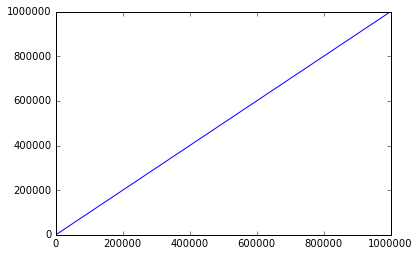

In [6]:
plt.scatter(primes, )

In [5]:
%matplotlib inline

In [14]:
[p for p in range(2,10) if is_probable_prime(p)]

[2, 3, 5, 7]

In [12]:
list(map(lambda x: 1 if is_probable_prime(x) else 0,[p for p in range(2,10)]))

[1, 1, 0, 1, 0, 1, 0, 0]

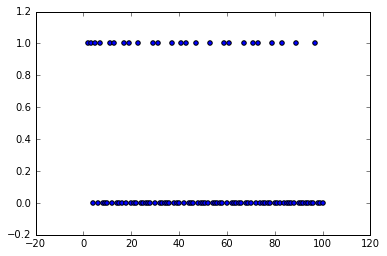

In [17]:
plt.scatter([p for p in range(2,101)], list(map(lambda x: 1 if is_probable_prime(x) else 0,[p for p in range(2,101)])))

In [43]:
diffs = []
for ix, elem in enumerate(primes):
    if ix < len(primes)-1:
        diffs.append(primes[ix+1] - elem)

In [44]:
max(diffs)

114

In [47]:
primes2 = []
import math
for num in range(1,1000000):
    if all(num%i!=0 for i in range(2,int(math.sqrt(num))+1)):
       primes2.append(num)

In [48]:
diffs2 = []
for ix, elem in enumerate(primes2):
    if ix < len(primes2)-1:
        diffs2.append(primes2[ix+1] - elem)

In [49]:
max(diffs2)

114

In [50]:
len(diffs2)

78498

In [51]:
# min distance between primes above 882377 (primes2[70000])
min(diffs2[70000:])

2

In [53]:
primes2[70000]

882377

In [ ]:
# conjecture: infinite number of even number separated pairs of primes.